<a href="https://colab.research.google.com/github/SubZer0811/ML_preprocessing/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

This is the directory that contains datasets, tags, weights, etc. for training the AUV Gazebo pool simulation.

## Description on the directory structure
- `dataset`: This directory contains zip files each containing at most 100 images that are assigned to people for tagging. 
- `tags`: This folder contains tags in .csv format.
- `preprocessed data`: Since we are using yolo for object detection, the tags need to be converted to a format accepted by yolo. This directory contains zip files that contains tag files along with the images. The images in the zip folder are the same images that are present in `dataset` directory.
- `classes.txt`: This file contains the tags present in the dataset.

## Training_[ ]

Training_[ ] contains the following directory structure: 
- `images`: This folder contains all images along with tag files for each image.
- `cfg`: This folder should contain the configuration file for training on darknet. This folder might not contain any configuration file in which case, you may need to create one.
- `weights`: This folder contains the weights that may have been obtained from training.
- `train.txt`: This file contains the path to images in training set.
- `test.txt`: This file contains the path to images in testing set.
- `valid.txt`: This file contains the path to images in validation set.
- `classes.txt`: This file contains the tags present in the dataset.
- `detector.data`: This file contains the path to the above mentioned directories and files for darknet.

# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Some path variables to make the code more readable

In [ ]:
WORKING_DIR = "/content/ws/"
DRIVE_PATH = "/content/drive/MyDrive/AUV\ SOCIETY/1-CS/AUV_sim_dataset/"

In [ ]:
import os
os.system(f'mkdir {WORKING_DIR}')
os.system(f'cp -r {DRIVE_PATH}* {WORKING_DIR}')
!ls /content/ws/

classes.txt  dataset  preprocessed_data  tags  Training_1


# Load classes and colour codes for verifying

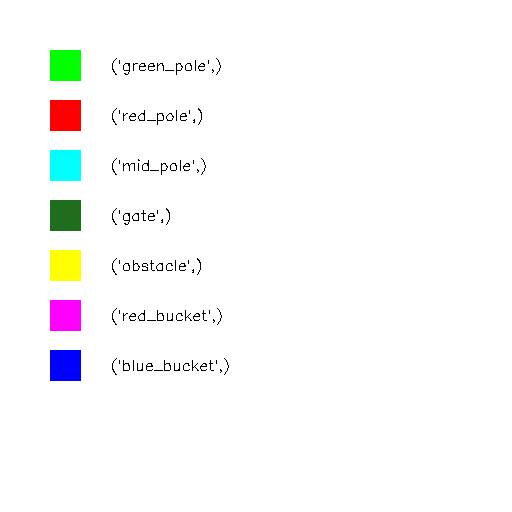

{'green_pole': 0, 'red_pole': 1, 'mid_pole': 2, 'gate': 3, 'obstacle': 4, 'red_bucket': 5, 'blue_bucket': 6}
{0: ('green_pole',), 1: ('red_pole',), 2: ('mid_pole',), 3: ('gate',), 4: ('obstacle',), 5: ('red_bucket',), 6: ('blue_bucket',)}


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

classes_file = open(f'{WORKING_DIR}classes.txt')
class_to_id = {}
id_to_class = {}
class_colours = {
    0: (0, 255, 0),
    1: (0, 0, 255),
    2: (255, 255, 0),
    3: (30, 110, 30),
    4: (0, 255, 255),
    5: (255, 0, 255),
    6: (255, 0, 0),
}


l = classes_file.readline()
count = 0
while l:
    class_to_id[l.strip('\n')] = count
    id_to_class[count] = (l.strip('\n'), )
    count += 1
    l = classes_file.readline()

img_3 = np.zeros([512,512,3],dtype=np.uint8)
img_3.fill(255)

x = 50; y = 50
for id in class_colours:
    cv2.rectangle(img_3, (x, y), (x+30, y+30), class_colours[id], -1)
    cv2.putText(img_3, str(id_to_class[id]), (x+60, y+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    y += 50

cv2_imshow(img_3)
cv2.imwrite(f"{WORKING_DIR}colour_code.png", img_3)

print(class_to_id)
print(id_to_class)


# Assign dataset number to preprocess

In [ ]:
NUMBER = 1

# Convert tags from .csv format to yolo format

In [ ]:
%matplotlib inline
import random
import cv2

def convert(FILE):

    yolof = open(f'{WORKING_DIR}tags/{FILE}', 'r')
    print(f"{WORKING_DIR}tags/{FILE}")
    preprocessed_data = f'{WORKING_DIR}preprocessed_data/{NUMBER}/'
    os.system(f'mkdir {preprocessed_data}')
    testing_set = f'{WORKING_DIR}testing_set/{NUMBER}/'
    os.system(f'mkdir {testing_set}')

    dataset = f'{WORKING_DIR}dataset/'
    os.system(f'unzip -j {dataset}{NUMBER}.zip -d {dataset}{NUMBER}')
    dataset = dataset + str(NUMBER) + '/'

    j = 1
    TEST_TOTAL = 5
    test_count = 0

    line = yolof.readline()
    line = yolof.readline()

    while (line != ''):

        spl = line.strip('\n').split(sep=',')
        
        img_name = spl[0].strip('"')
        img_path = dataset + img_name
        print(img_path)
        img = cv2.imread(img_path)
        
        # if random.randrange(1000)%99 == 0 and test_count < TEST_TOTAL:
        #     filename = testing_set + img_name.split(sep='.')[0] + ".txt"
        #     os.system(f'cp {img_path} {testing_set}')

        # else:
        #     filename = training_set + img_name.split(sep='.')[0] + ".txt"
        #     os.system(f'cp {img_path} {training_set}')

        filename = preprocessed_data + img_name.split(sep='.')[0] + ".txt"
        os.system(f'cp {img_path} {preprocessed_data}')

        txtfile = open(filename, 'a')

        text = spl[1:-1]
        text = [float(i) for i in text]

        x = (text[0] + text[2])/2           # center of box
        y = (text[1] + text[3])/2           # center of box
        w = text[2] - text[0]               # width of box
        h = text[3] - text[1]               # height of box

        class_ = spl[-1].strip('"\n')

        dncoords = ''
        dncoords += str(class_to_id[class_]) + ' '
        dncoords += str(x/img.shape[1]) + ' '
        dncoords += str(y/img.shape[0]) + ' '
        dncoords += str(w/img.shape[1]) + ' '
        dncoords += str(h/img.shape[0]) + '\n'

        txtfile.writelines(dncoords)

        line = yolof.readline()
        j+=1

convert(f"{NUMBER}.csv")

# Check if all images are annotated correctly

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output 

def show(img_path):

    print(img_path)
    img = cv2.imread(img_path)
    f = open(img_path.split('.')[0] + ".txt")
    dh, dw, _ = img.shape

    line = f.readline()

    while line:

        class_id, x, y, w, h = map(float, line.split(' '))
        
        l = int((x - w / 2) * dw)
        r = int((x + w / 2) * dw)
        t = int((y - h / 2) * dh)
        b = int((y + h / 2) * dh)
        
        if l < 0:
            l = 0
        if r > dw - 1:
            r = dw - 1
        if t < 0:
            t = 0
        if b > dh - 1:
            b = dh - 1

        cv2.rectangle(img, (l, t), (r, b), class_colours[class_id], 2)
        cv2.putText(img, img_path.split('/')[-1], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        
        line = f.readline()
    f.close()

    cv2_imshow(img)
    cv2.waitKey()

# imgs = os.listdir(f'{WORKING_DIR}testing_set/{NUMBER}')

# for x in imgs:
#     if x.endswith('.jpg'):
#         show(f'{WORKING_DIR}testing_set/{NUMBER}/{x}')
#         # cv2.waitKey()
#         # clear_output()


imgs = os.listdir(f'{WORKING_DIR}preprocessed_data/{NUMBER}')

for x in imgs:
    if x.endswith('.jpg'):
        show(f'{WORKING_DIR}preprocessed_data/{NUMBER}/{x}')
        # clear_output()

# Save converted tags along with images to cloud

In [ ]:
os.system(f'cd {WORKING_DIR}preprocessed_data/; zip -r -D {DRIVE_PATH}/preprocessed_data/{NUMBER}.zip {NUMBER}')

0

# Generate file structure for training with darknet

In [ ]:
FOLDER_NAME = "Training_1/"

In [ ]:
os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}weights")
os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}images")
os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}cfg")

0

In [ ]:
import random

to_be_unzipped = [1, 2, 3, 4, 5, 6, 7]

os.system(f"mkdir -p {WORKING_DIR}{FOLDER_NAME}tmp")

for id in to_be_unzipped:
    os.system(f'unzip -j {WORKING_DIR}preprocessed_data/{id}.zip -d {WORKING_DIR}Training_1/images')

list_dir = os.listdir(f'{WORKING_DIR}Training_1/images')
imgs = []
org_imgs = []
train = []
valid = []
test = []

for x in list_dir:
    if x.endswith('.jpg'):
        imgs.append(x)

org_imgs = imgs.copy()
len_train = int(0.8 * len(imgs))
len_valid = int(0.1 * len(imgs))
len_test = len(imgs) - len_train - len_valid

print(f"TOTAL: {len(imgs)}")
print(f'len_train: {len_train}')
print(f'len_valid: {len_valid}')
print(f'len_test: {len_test}')

for i in range(len_train):
    id = random.randint(0, len(imgs)-1)
    train.append(imgs[id])
    imgs.remove(imgs[id])

for i in range(len_test):
    id = random.randint(0, len(imgs)-1)
    test.append(imgs[id])
    imgs.remove(imgs[id])

valid = imgs

print(f'\nlen_train: {len(train)}')
print(f'len_valid: {len(valid)}')
print(f'len_test: {len(test)}')

# VERIFY IF SETS ARE MUTUALLY EXCLUSIVE
temp = test + train + valid
temp.sort()
org_imgs.sort()
print(temp)
print(org_imgs)

if org_imgs == temp:
    print("MUTUALLY EXCLUSIVE")

    train_file = open(f'{WORKING_DIR}{FOLDER_NAME}train.txt', 'w')
    for i in train:
        train_file.write(f'images/{i}\n')
    train_file.close()

    test_file = open(f'{WORKING_DIR}{FOLDER_NAME}test.txt', 'w')
    for i in test:
        test_file.write(f'images/{i}\n')
    test_file.close()

    valid_file = open(f'{WORKING_DIR}{FOLDER_NAME}valid.txt', 'w')
    for i in valid:
        valid_file.write(f'images/{i}\n')
    valid_file.close()

else:
    print("ERROR")



TOTAL: 664
len_train: 531
len_valid: 66
len_test: 67

len_train: 531
len_valid: 66
len_test: 67
['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '17.jpg', '170.jpg', '171.jpg', '172.jpg', '173.jpg', 

In [ ]:
os.system(f"cp {WORKING_DIR}classes.txt {WORKING_DIR}{FOLDER_NAME}")

0

In [ ]:
os.system(f'cd {WORKING_DIR}; zip -r {DRIVE_PATH}{FOLDER_NAME[:-1]}.zip {FOLDER_NAME}*')

0

# REVERT

In [ ]:
os.system(f'rm -r {WORKING_DIR}')

0